# Data exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [11]:
wna_data = pd.read_csv('../data/p2_fmt_wNA.csv',sep='\t')
wna_data.iloc[:,2:] = wna_data.iloc[:,2:].add(1).fillna(0) # 填补0并将所有值+1
wna_data

,#CHROM,POS,K10G,K12G,K13G,K16G,K21G,K23G,K25G,K28G,...,metaspades_90,metaspades_91,metaspades_92,metaspades_93,metaspades_94,metawrap_assemle_2487B,metawrap_assemle_2487C,metawrap_assemle_2487D,metawrap_assemle_2487E,read
0,EGOHCJCO_00001,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
1,EGOHCJCO_00001,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
2,EGOHCJCO_00003,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
3,EGOHCJCO_00006,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,EGOHCJCO_00006,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124458,KMKHEIEB_02137,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124459,KMKHEIEB_02144,443,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124460,KMKHEIEB_02144,471,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124461,KMKHEIEB_02144,473,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
region = pd.read_csv('../data/id_region.txt',sep='\t')
region.head()

,Id,region1,region2
0,K10G,KA,KA
1,K12G,KA,KA
2,K13G,KA,KA
3,K16G,KA,KA
4,K21G,KA,KA


## 1. sparse PCA


In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn import random_projection

In [58]:
# random projection
transformer = random_projection.GaussianRandomProjection(n_components=1000)
wna_data_projected = transformer.fit_transform(wna_data.iloc[:,2:].T)
print(wna_data_projected.shape) 

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wna_data_projected)

(90, 1000)


In [88]:
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
print(f"cumulative variance explained: {cumulative_variance_explained[-1]:.2%}")

cumulative variance explained: 61.57%


In [86]:
pca_region = pd.concat([region,pd.DataFrame(pca_result,columns=['pc1','pc2'])],axis=1)

Text(0.5, 1.0, 'PCA')

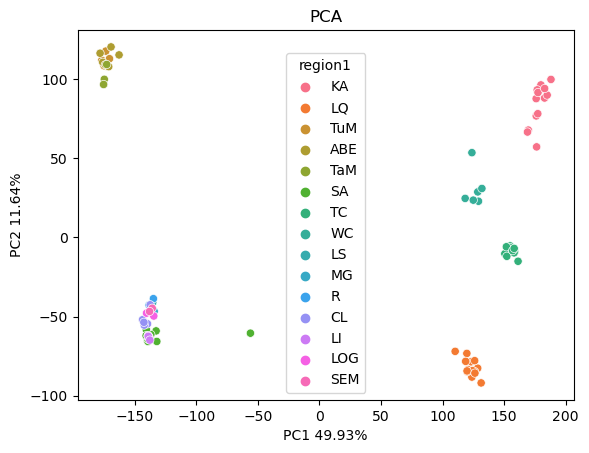

In [103]:
sns.scatterplot(data=pca_region, x="pc1", y="pc2", hue="region1")
plt.xlabel(f"PC1 {pca.explained_variance_ratio_[0]:.02%}")
plt.ylabel(f"PC2 {pca.explained_variance_ratio_[1]:.02%}")
plt.title('PCA')